<a href="https://colab.research.google.com/github/BhavikDudhrejiya/Recommender-System/blob/main/Fashion_Recommender_System_using_ResNet50_(transfer_learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing require libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import zipfile
from PIL import Image
import numpy as np
from numpy.linalg import norm
import os
import pickle
from tqdm import tqdm_notebook
import numpy as np
from sklearn.neighbors import NearestNeighbors
from google.colab import files


# Unzip file and Loading Images

In [2]:
with zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/Dataset/Fashion_images.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

# Loading resnet50 model

In [3]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
model.trainable = False #We are not going to train our model

94781440/94765736 [==============================] - 1s 0us/step


In [4]:
model = tf.keras.Sequential(
    [
     model,
     GlobalMaxPooling2D()
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d (Globa  (None, 2048)             0         
 lMaxPooling2D)                                                  
                                                                 
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


# Creating function to extract features

In [5]:
def extract_features(image_path):
  #Loading image
  img = image.load_img(image_path, target_size=(224, 224))

  #Converting image into array
  img_array = image.img_to_array(img)

  #Expand the dimension
  expand_img_array = np.expand_dims(img_array, axis=0)

  #Preprocess image as per the requirement of Resnet model for prediction
  preprocessed_img = preprocess_input(expand_img_array)

  result = model.predict(preprocessed_img).flatten()
  #Prediction
  norm_result = result/norm(result)

  return norm_result

#Extract Images Names

In [6]:
images_list = os.listdir('/content/images')
images_list[0:5]

['8220.jpg', '17417.jpg', '3622.jpg', '7101.jpg', '14969.jpg']

In [ ]:
image_features = []
for i in tqdm_notebook(images_list):
  image_features.append(extract_features(f'/content/images/{i}'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/44441 [00:00<?, ?it/s]

# Saving embeddings & image names

In [ ]:
pickle.dump(image_features,open('/content/drive/MyDrive/Colab Notebooks/Dataset/embeddings.pkl','wb'))
pickle.dump(images_list,open('/content/drive/MyDrive/Colab Notebooks/Dataset/image_name.pkl','wb'))

# Loading embeddings & image names

In [7]:
feature_list = np.array(pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Dataset/embeddings.pkl', 'rb')))
image_names = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Dataset/image_name.pkl', 'rb'))

In [8]:
n = NearestNeighbors(n_neighbors=10, 
                     algorithm='brute', 
                     metric='euclidean')
n.fit(feature_list)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=10)

# Loading image for recommendation

In [9]:
uploaded = files.upload()

Saving test2.jpg to test2.jpg


# Fashion cloth recommeder

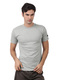

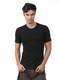

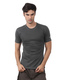

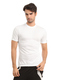

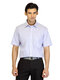

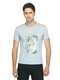

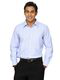

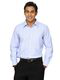

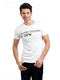

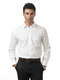

In [10]:
normalize_result = extract_features(f'/content/{list(uploaded.keys())[0]}')
distances, indices = n.kneighbors([normalize_result])
images_ = []
for i in indices[0]:
  images_.append(image_names[i])

for i in images_:
  display(Image.open(f'/content/myntradataset/images/{str(i)}'))